In [1]:
%load_ext autoreload
%autoreload 2

import subprocess
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import chess.pgn
from chess import Board, Move, Color
from chess.engine import SimpleEngine, Limit, PovScore
from chesslab.game_score import GameScore
from chesslab.collection import Collection
import numpy as np

In [2]:
engine = SimpleEngine.popen_uci("../engines/stockfish.exe", creationflags=subprocess.CREATE_NO_WINDOW)

In [3]:
collection = Collection("../data/magnus_first.pgn")

In [4]:
collection.compute_scores_and_save(engine, overwrite=True)

game 1
..........................................................................................................
154 sec
game 2
..........................................................................
255 sec
game 3
.............................................................................................................
418 sec
game 4
.....................................................................
523 sec
game 5
..............................................................
618 sec
game 6
.....................................................
698 sec
game 7
....................................................
772 sec
game 8
..............................................................
852 sec
game 9
....................................................................................................
1005 sec
game 10
..................................................................................................
1146 sec
game 11
............................................

In [5]:
len(collection.games)

226

In [16]:
seq = []
user = "Magnus Carlsen"
# user = "Player"
for game in collection.games:
    score = None
    if game.headers['White'] == user:
        score = float(game.headers['WhiteScore'])
    if game.headers['Black'] == user:
        score = float(game.headers['BlackScore'])
    if score is None:
        print(game.headers['White'], game.headers['Black'])
        continue

    date = datetime.datetime.strptime(game.headers['Date'], '%Y.%m.%d')
    seq.append((date, score))

seq.sort(key=lambda k:k[0])

In [17]:
df = pd.DataFrame(seq, columns=['date', 'score'])
df.set_index('date', inplace=True)

In [197]:
df_chosen = df[df.score > -100]

In [18]:
len(df)

226

In [19]:
df

,score
date,
1999-07-03,-61.92
1999-07-04,-38.46
1999-07-05,-142.04
1999-07-05,-75.91
1999-07-06,-26.97
...,...
2001-12-29,-26.47
2001-12-29,-52.03
2001-12-29,-19.36


In [20]:
average = df.resample('M').mean()

In [30]:
average.dropna(inplace=True)

In [132]:
x, y = zip(*seq)

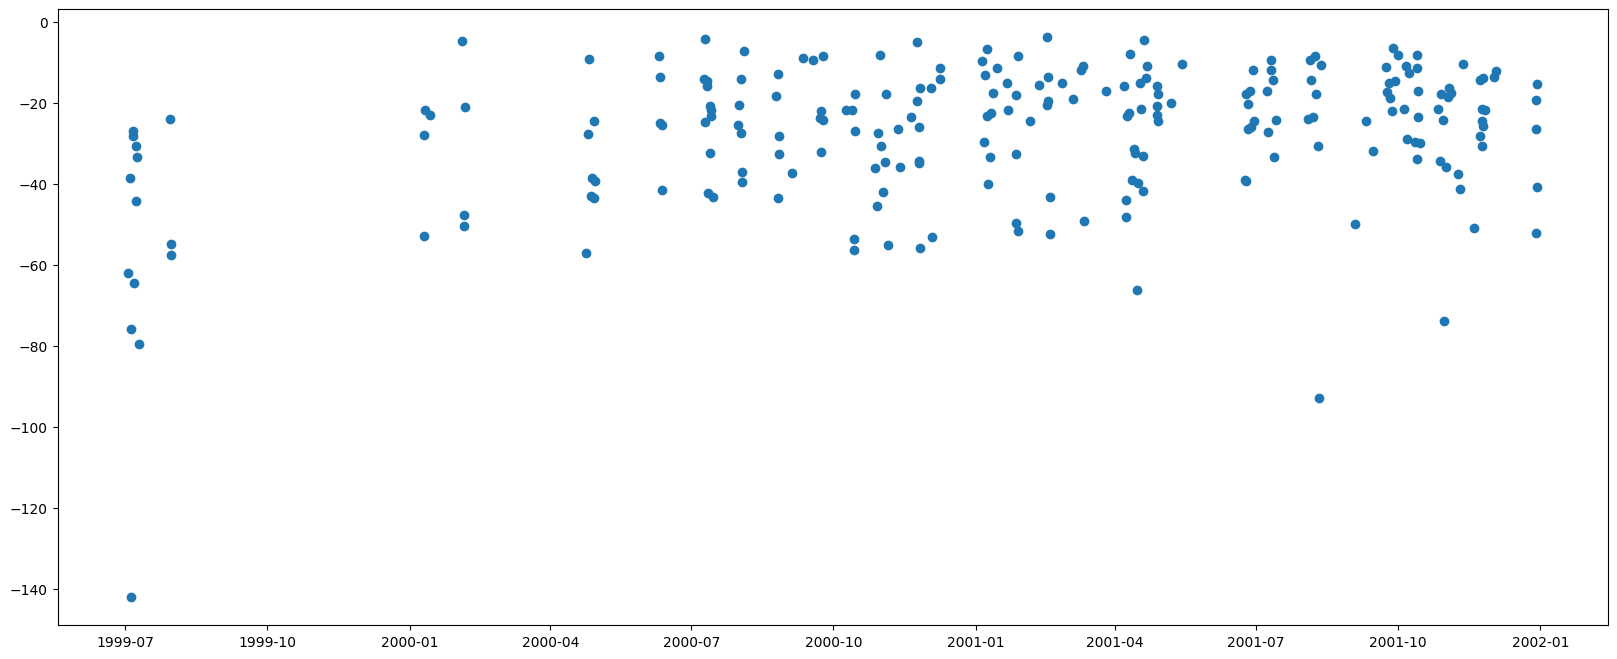

In [22]:
plt.figure(figsize=(20,8))
plt.plot(df.index, df['score'], 'o')
#plt.plot(average.index, average['score'], '-')

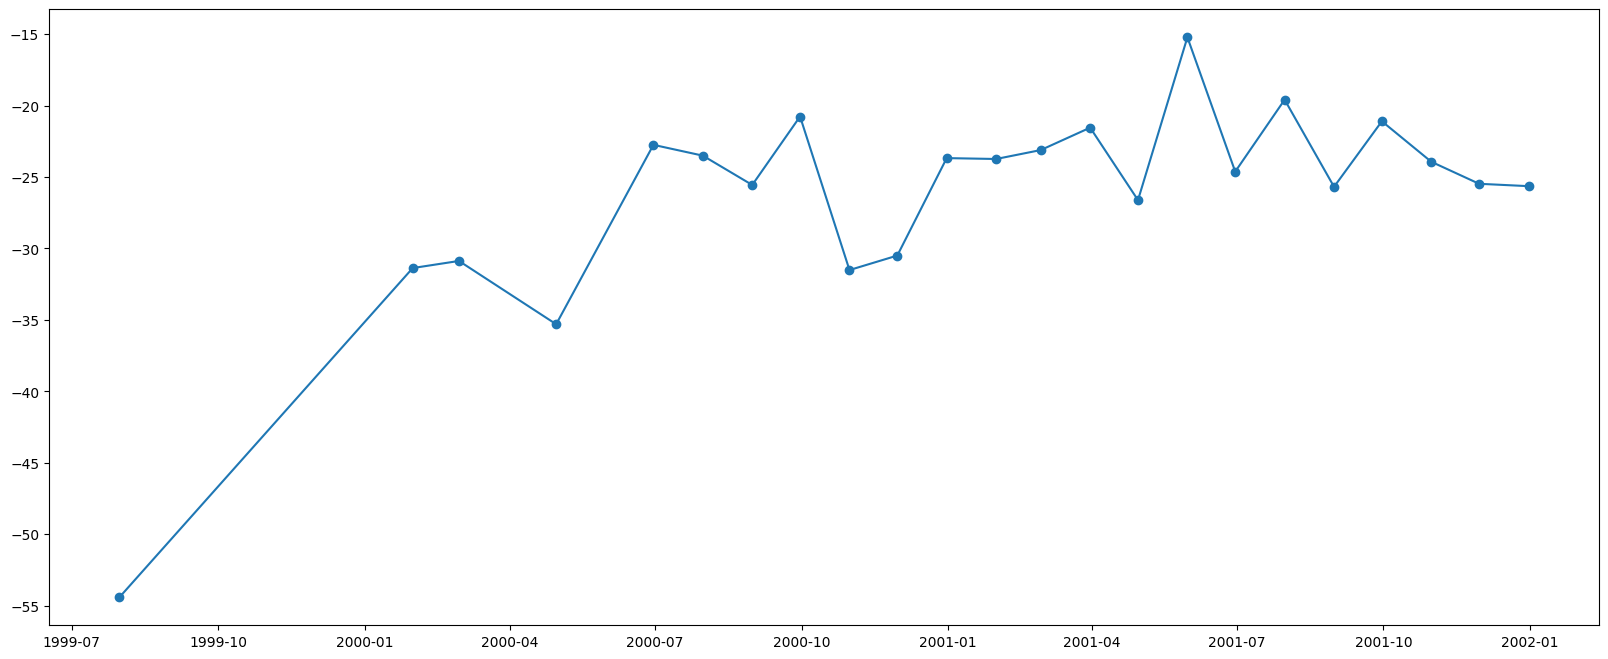

In [31]:
plt.figure(figsize=(20,8))
plt.plot(list(average.index), list(average['score']), 'o-')

In [152]:
from chesslab.game_score import GameScore

In [160]:
gs = GameScore(collection.games[1], engine, Limit(time=0.5))

In [161]:
gs.score()

.............................................................................................................................................................


{'white': -47.12658227848101, 'black': -130.01282051282053}